### Loading the dataset

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from NNdm_tools import data_prep
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# set the random seed - consistent
rs = 80

# load the data
df, X, y, X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Columns: 168 entries, contacts_count to working_travel non critical
dtypes: float64(2), int64(17), uint8(149)
memory usage: 1.5 MB


### Training the MLPClassifier

Training our first model by fitting training data and testing the performance on the test data

In [3]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9882583170254403
Test accuracy: 0.7842242503259452
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       973
           1       0.72      0.67      0.70       561

    accuracy                           0.78      1534
   macro avg       0.77      0.76      0.76      1534
weighted avg       0.78      0.78      0.78      1534

MLPClassifier(random_state=80)


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

Train accuracy: 0.9882583170254403
Test accuracy: 0.7842242503259452


In [5]:
hyperparams = model_1.get_params()
for hyperparam in 'activation', 'solver', 'max_iter':
    print(hyperparam,": ", hyperparams[hyperparam])


activation :  relu
solver :  adam
max_iter :  200


### Tuning with GridSearchCV

In [6]:
print(X_train.shape)

(3577, 167)


With 167 features we will start tuning with one hidden layer of 2 to 28 neurons, increment of 6.

In [7]:
params = {'hidden_layer_sizes': [(x,) for x in range(2, 28, 6)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=1000,
    random_state=rs), return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_

Total number of models:  5


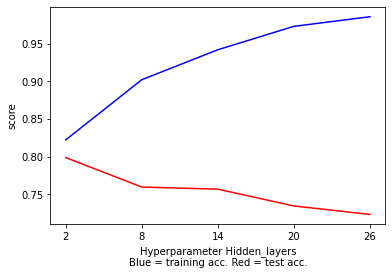

In [8]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b',
         range(0, len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)), range(2, 28, 6))
plt.ylabel('score')
plt.show()


Now plotting mean train and test scores

Total number of models:  5


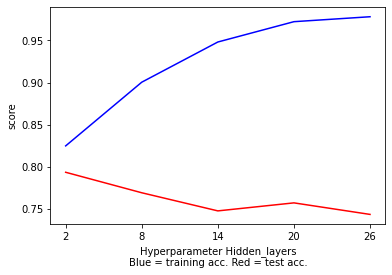

In [9]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b',
         range(0, len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)), range(2, 28, 6))
plt.ylabel('score')
plt.show()


In [10]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.8216382443388314
Test accuracy: 0.7933507170795306
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       973
           1       0.78      0.61      0.68       561

    accuracy                           0.79      1534
   macro avg       0.79      0.75      0.76      1534
weighted avg       0.79      0.79      0.79      1534

{'hidden_layer_sizes': (2,)}


In [11]:
hyperparams2 = cv_1.get_params()
print(hyperparams)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 80, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [12]:
for hyperparam in 'estimator__activation', 'estimator__alpha', 'estimator__solver', 'estimator__max_iter':
    print(hyperparam,": ", hyperparams2[hyperparam])

estimator__activation :  relu
estimator__alpha :  0.0001
estimator__solver :  adam
estimator__max_iter :  1000


In [13]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)


Train accuracy: 0.8216382443388314
Test accuracy: 0.7933507170795306
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       973
           1       0.78      0.61      0.68       561

    accuracy                           0.79      1534
   macro avg       0.79      0.75      0.76      1534
weighted avg       0.79      0.79      0.79      1534

{'hidden_layer_sizes': (2,)}


## Question 4 Reduced Dimension

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    min_samples_leaf=15,
    random_state=rs,
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=15,
                       random_state=80)

In [23]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=15,
                       random_state=80)

In [24]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(dt_model, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
X_train_sel_model.shape


(3577, 18)

In [25]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [
    0.01, 0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(
    random_state=rs,max_iter=1000), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)


Train accuracy: 0.8202404249370981
Test accuracy: 0.8005215123859192
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       973
           1       0.77      0.65      0.71       561

    accuracy                           0.80      1534
   macro avg       0.79      0.77      0.78      1534
weighted avg       0.80      0.80      0.80      1534

{'alpha': 0.001, 'hidden_layer_sizes': (7,)}


In [26]:
for i in range(len(X.columns)):
    if selectmodel.get_support()[i]:
        print(X.columns[i])

contacts_count
house_count
covid19_symptoms
covid19_contact
compromised_immune
health_worker
risk_mortality
region_AM
country_BR
age_60_70
blood_type_ap
insurance_yes
income_high
income_med
race_white
smoking_never
working_stopped
working_travel critical


In [27]:
cv_sel_model.best_estimator_.n_iter_

222

Comparing models to fine the best model

In [28]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_dt_cv = cv_sel_model.predict_proba(X_test_sel_model)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])

roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])


roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)

print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)

print("ROC index on test for NN with feature selection and gridsearch:", roc_index_dt_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])

fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])

fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.8330997539630632
ROC index on test for NN with gridsearch 1: 0.8414316675002245
ROC index on test for NN with feature selection and gridsearch: 0.8561013679507121
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8561013679507121


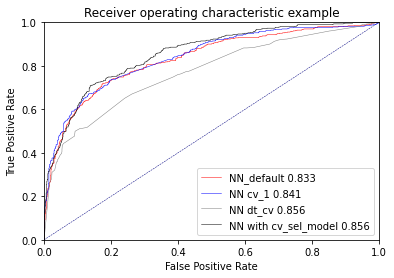

In [30]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(
    roc_index_nn_1), color='red', lw=0.5)

plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(
    roc_index_cv_1), color='blue', lw=0.5)

plt.plot(fpr_dt_cv, tpr_dt_cv, label='NN dt_cv {:.3f}'.format(
    roc_index_dt_cv), color='gray', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(
    roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
